In [348]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
from collections import Counter
from fancyimpute import KNN
from ggplot import *
from collections import Counter
from scipy.stats import chi2_contingency
import scipy.stats as stats
import statsmodels.api as sm
import gmplot
import xgboost as xgb
import lightgbm as lgbm
from sklearn.metrics import mean_squared_error

In [349]:
os.chdir("C:/Users/rakshith/Desktop/DataSets/Edwisor/Cab fare prediction/Python files")

In [350]:
# Reading the data files
cab_train=pd.read_csv("train_cab.csv")
cab_test=pd.read_csv("test.csv")

In [351]:
cab_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [352]:
cab_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [353]:
cab_train.shape,cab_test.shape

((16067, 7), (9914, 6))

In [354]:
cab_train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

1. fare_amount and pickup_datetime are of type object

In [355]:
cab_test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [356]:
cab_train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [357]:
cab_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


1. The range of co-ordinates of train set are different from that of test data set
2. Train data set has to be adjusted according to test data set
3. passenger count of train is highly varying when compared to test data set.

In [358]:
cab_train['passenger_count'].unique()

array([1.000e+00, 2.000e+00, 3.000e+00,       nan, 6.000e+00, 5.000e+00,
       4.000e+00, 2.360e+02, 4.560e+02, 5.334e+03, 0.000e+00, 5.350e+02,
       3.540e+02, 5.500e+01, 5.540e+02, 5.300e+01, 3.500e+01, 3.450e+02,
       5.345e+03, 5.360e+02, 4.300e+01, 5.800e+01, 5.370e+02, 8.700e+01,
       5.312e+02, 1.300e+00, 1.200e-01, 5.570e+02])

# Co-ordinates Visualization

In [359]:
pickup_longitude_list=list(cab_train['pickup_longitude'])
pickup_latitude_list=list(cab_train['pickup_latitude'])

In [360]:
# Scatter plot of pickup points
gmap=gmplot.GoogleMapPlotter(40.7128, -74.0060,13)

In [361]:
gmap.scatter( pickup_latitude_list,pickup_longitude_list, '# FF0000', 
                              size = 40, marker = False ) 

In [362]:
gmap.draw("mymap.html")

1. The data points are concentrated to newyork city


In [363]:
# creating boundiing box for newyork city using co-ordinates from google
BB=(-74.5,-72.8,40.5,41.8)

In [364]:
## loading newyork city map
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')
## map can also be read from opestreetmap.org, since export data was too large so map was extracted from one of the blogs

In [365]:
def map_plot(df,BB,nyc_map):
    fig,ax = plt.subplots(1,2,figsize=(16,10))
    ax[0].scatter(df.pickup_longitude,df.pickup_latitude,zorder=1,alpha=0.2,s=10)
    ax[0].set_xlim(BB[0],BB[1])
    ax[0].set_ylim(BB[2],BB[3])
    ax[0].set_title("pickup_location_map")
    ax[0].imshow(nyc_map,zorder=0,extent=BB)
    
    ax[1].scatter(df.dropoff_longitude,df.dropoff_latitude,zorder=1,alpha=0.2,s=10)
    ax[1].set_xlim(BB[0],BB[1])
    ax[1].set_ylim(BB[2],BB[3])
    ax[1].set_title("dropoff_locations_map")
    ax[1].imshow(nyc_map,zorder=0,extent=BB)

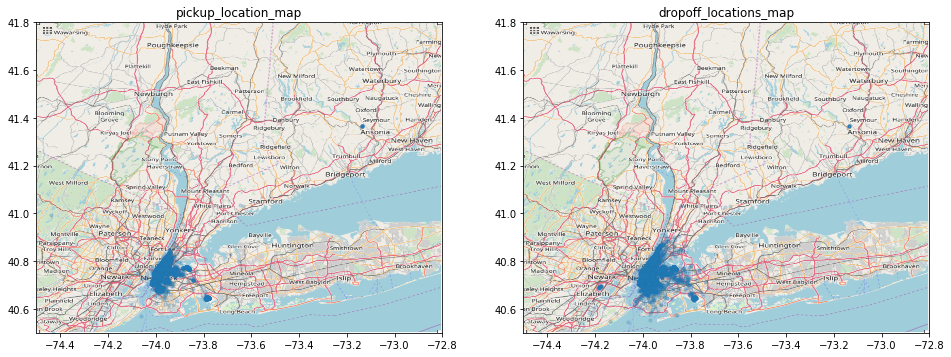

In [366]:
map_plot(cab_train,BB,nyc_map)

In [367]:
BB_zoom = (-74.3, -73.7, 40.5, 40.9)
nyc_map_zoom = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')

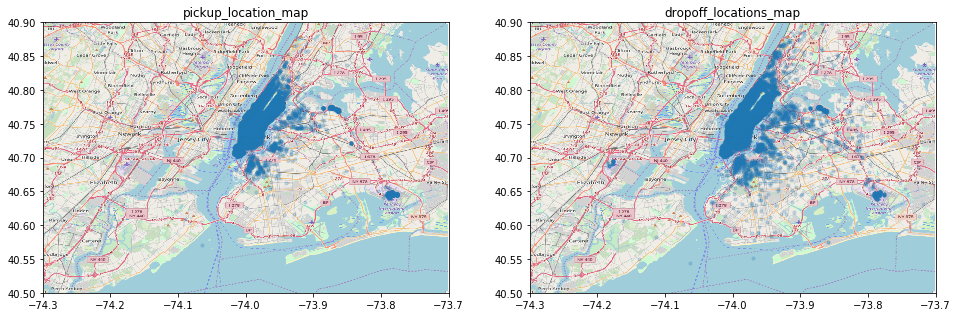

In [368]:
# plotting map with zoomed co-ordinates
map_plot(cab_train,BB_zoom,nyc_map_zoom)

1. from above co-ordinates it is clear that the co-ordinates are lying on newyork state of USA
2. There are no pickup from newark but there are drop off to newark

In [369]:
# Removing all the co-ordinates outside of this Bounding Box
cab_train=cab_train.drop((cab_train[cab_train['pickup_longitude']>-73.7]).index,axis=0)
cab_train=cab_train.drop((cab_train[cab_train['pickup_longitude']<-74.3]).index,axis=0)
cab_train=cab_train.drop((cab_train[cab_train['dropoff_longitude']>-73.7]).index,axis=0)
cab_train=cab_train.drop((cab_train[cab_train['dropoff_longitude']<-74.3]).index,axis=0)

cab_train=cab_train.drop((cab_train[cab_train['pickup_latitude']<40.5]).index,axis=0)
cab_train=cab_train.drop((cab_train[cab_train['pickup_latitude']>40.9]).index,axis=0)
cab_train=cab_train.drop((cab_train[cab_train['dropoff_latitude']<40.5]).index,axis=0)
cab_train=cab_train.drop((cab_train[cab_train['dropoff_longitude']>40.9]).index,axis=0)

In [370]:
cab_train.shape

(15695, 7)

# Missing value Analysis

In [371]:
missing_val=pd.DataFrame(cab_train.isnull().sum())

In [372]:
missing_val=missing_val.reset_index()

In [373]:
missing_val=missing_val.rename(columns={'index':'variable',0:'missing_count'})

In [374]:
missing_val

,variable,missing_count
0,fare_amount,22
1,pickup_datetime,0
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55


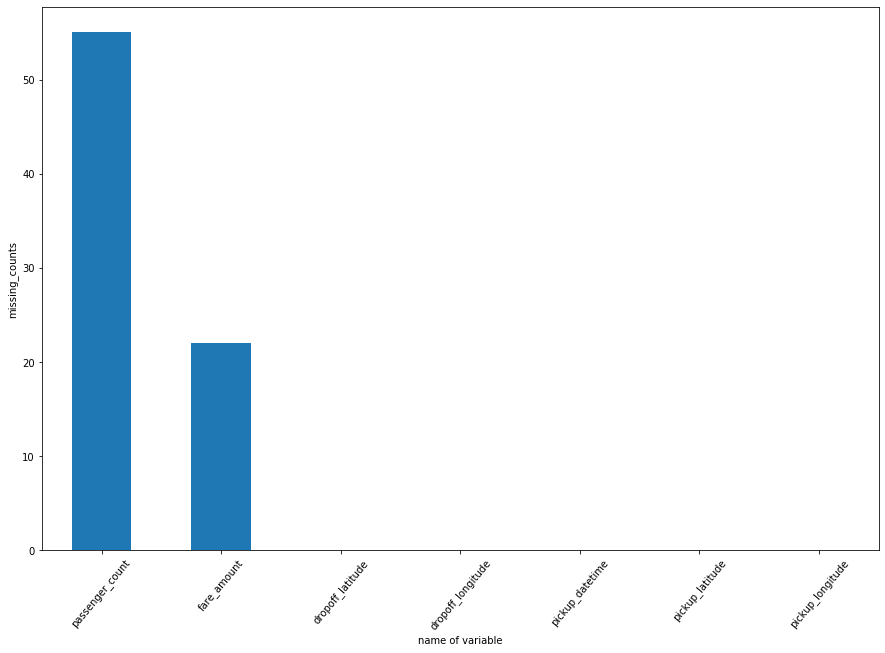

In [375]:
missing_val=missing_val.groupby('variable')
plt.figure(figsize=(15,10))
missing_val.max().sort_values(by="missing_count",ascending=False)["missing_count"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("name of variable")
plt.ylabel("missing_counts")
plt.show()

1. Only fare_amount and passenger_count contains missing values
2. since the missing count is less, will drop the rows containing missing count

In [376]:
cab_train=cab_train.drop(cab_train[cab_train['fare_amount'].isnull()].index,axis=0)
cab_train=cab_train.drop(cab_train[cab_train['passenger_count'].isnull()].index,axis=0)

In [377]:
cab_train.shape

(15618, 7)

In [378]:
print(cab_train.isnull().sum())

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [379]:
# Checking missing value in test data set
print(cab_test.isnull().sum())

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


1. test data set contains no missing value

# Outliers Analysis

In [380]:
# converting fare amount to numeric
cab_train['fare_amount']=pd.to_numeric(cab_train['fare_amount'],errors = "coerce")
# Rounding of passenger count
cab_train['passenger_count']=round(cab_train['passenger_count'])

In [381]:
cab_train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [382]:
# considering fare amount
print("Fare amount equal to zero is {}".format(sum(cab_train['fare_amount']==0)))
print("Fare amount greater than 75 is {}".format(sum(cab_train['fare_amount']>75)))#  taxifare details in newyork using google 
print("Fare amount less than 1 is {}".format(sum(cab_train['fare_amount']<1)))

Fare amount equal to zero is 1
Fare amount greater than 75 is 19
Fare amount less than 1 is 5


In [383]:
# Removing fare amount that are nnot making sense
cab_train=cab_train.drop((cab_train[cab_train['fare_amount']==0]).index,axis=0)
cab_train=cab_train.drop((cab_train[cab_train['fare_amount']>75]).index,axis=0)
cab_train=cab_train.drop((cab_train[cab_train['fare_amount']<1]).index,axis=0)

In [384]:
cab_train.shape

(15594, 7)

Text(0, 0.5, 'Frequency')

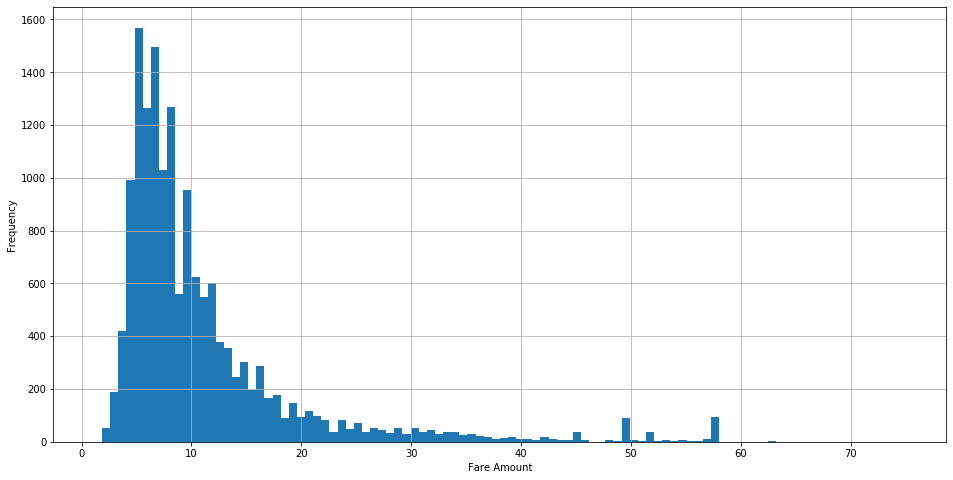

In [385]:
cab_train.fare_amount.hist(bins=100,figsize=(16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

In [386]:
## passenger count
# since in the test data set a max of 6 passengers are present, will consider the same for train data set
print("rides with passengers greater than 6 is {}".format(sum(cab_train['passenger_count']>6)))
print("rides with passengers equal to zero is {}".format(sum(cab_train['passenger_count']==0)))
print("rides with passengers lesser than zero is {}".format(sum(cab_train['passenger_count']<0)))

rides with passengers greater than 6 is 17
rides with passengers equal to zero is 56
rides with passengers lesser than zero is 0


In [387]:
#Removing rows containing passenger count which are outliers.
cab_train=cab_train.drop((cab_train[cab_train['passenger_count']>6]).index,axis=0)
cab_train=cab_train.drop((cab_train[cab_train['passenger_count']==0]).index,axis=0)

Text(0, 0.5, 'Frequency')

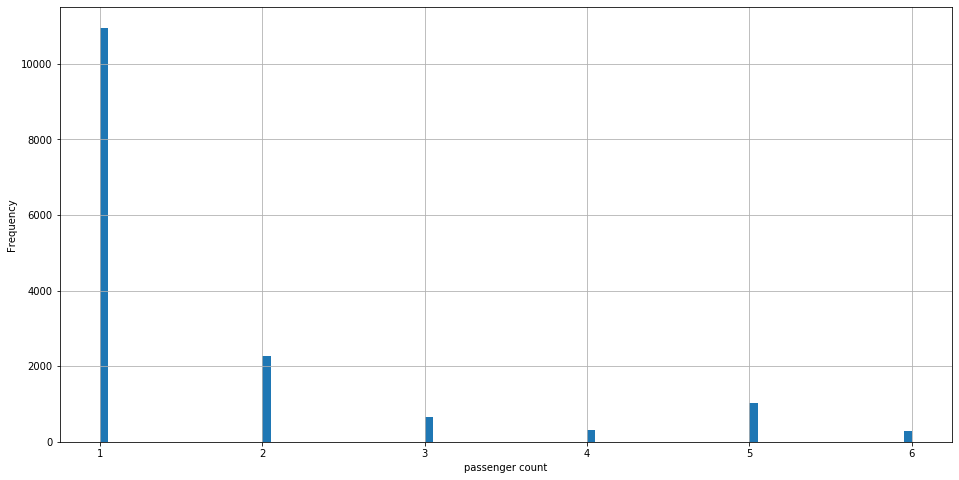

In [388]:
cab_train.passenger_count.hist(bins=100,figsize=(16,8))
plt.xlabel("passenger count")
plt.ylabel("Frequency")

In [389]:
cab_train.shape

(15521, 7)

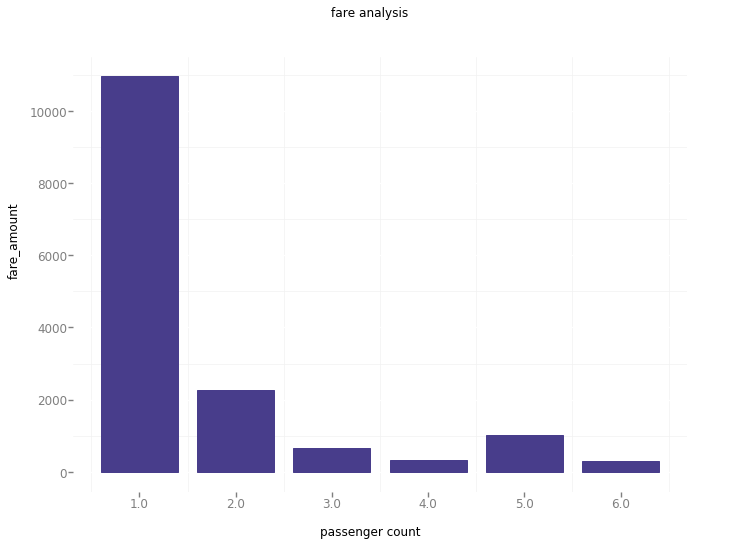

<ggplot: (-9223371915620752054)>

In [390]:
ggplot(cab_train,aes(x="passenger_count",y="fare_amount"))+\
geom_bar(fill="darkslateblue")+\
scale_color_brewer(type="diverging",palette=4)+\
xlab("passenger count")+ylab("fare_amount")+ggtitle("fare analysis")+theme_bw()

1. Most of the rides are taken by single passengers
2. most of the fare amount is concentrated at single passenger rides

In [391]:
# Rechecking for missing values
cab_train.isnull().sum()

fare_amount          1
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [392]:
# removing the null value
cab_train=cab_train.drop(cab_train[cab_train['fare_amount'].isnull()].index,axis=0)

# Feature Engineering

In [393]:
# Converting pickup_datetime from object to datetime in both data set
cab_train['pickup_datetime']=pd.to_datetime(cab_train['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC',errors = "coerce")
cab_test['pickup_datetime']=pd.to_datetime(cab_test['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')

In [394]:
cab_train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

In [395]:
cab_test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [396]:
cab_train.isnull().sum()

fare_amount          0
pickup_datetime      1
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [397]:
# removing the created null value
cab_train=cab_train.drop(cab_train[cab_train['pickup_datetime'].isnull()].index,axis=0)


In [398]:
# Extracting year,month,date,day of the week,hour of pickup from train data set
cab_train['pickup_year']=cab_train['pickup_datetime'].dt.year
cab_train['pickup_month']=cab_train['pickup_datetime'].dt.month
cab_train['pickup_date']=cab_train['pickup_datetime'].dt.day
cab_train['pickup_day']=cab_train['pickup_datetime'].dt.dayofweek
cab_train['pickup_hour']=cab_train['pickup_datetime'].dt.hour

In [399]:
# Extracting year,month,date,day of the week,hour of pickup from test data set
cab_test['pickup_year']=cab_test['pickup_datetime'].dt.year
cab_test['pickup_month']=cab_test['pickup_datetime'].dt.month
cab_test['pickup_date']=cab_test['pickup_datetime'].dt.day
cab_test['pickup_day']=cab_test['pickup_datetime'].dt.dayofweek
cab_test['pickup_hour']=cab_test['pickup_datetime'].dt.hour

In [400]:
cab_train.shape, cab_test.shape

((15519, 12), (9914, 11))

In [401]:
## Generating distance travelled using co-ordinates and HAVERSINE FORMULA
def haversine_distance(lat1,long1,lat2,long2):
    data=[cab_train,cab_test]
    for i in data:
        R = 6371 # Radius of earth
        ph1=np.radians(i[lat1])
        ph2=np.radians(i[lat2])
        
        delt_ph=np.radians(i[lat2]-i[lat1])
        delt_lam=np.radians(i[long2]-i[long1])
        
        a=np.sin(delt_ph/2)**2+np.cos(ph1)*np.cos(ph2)*np.sin(delt_lam/2)**2
        c=2*np.arctan2(np.sqrt(a),np.sqrt(1-a))
        
        d=R*c
        i['dist_covered']=d
    return d
                

In [402]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323259
1        2.425353
2        0.618628
3        1.961033
4        5.387301
5        3.222549
6        0.929601
7       21.540102
8        3.873962
9        1.099794
10       2.317685
11       4.819179
12       0.722670
13       1.675503
14       2.504032
15       5.115375
16       0.298838
17       2.531147
18       0.780444
19       0.427282
20       1.651946
21       1.969211
22       1.305441
23       1.901295
24       5.779720
25       1.121687
26      14.306540
27       9.427870
28       1.144529
29       4.696371
          ...    
9884    15.119293
9885     5.006239
9886     7.376754
9887     1.680721
9888     0.000000
9889     2.377723
9890     2.944581
9891     5.952839
9892     2.950361
9893     4.735375
9894     3.101361
9895     9.000325
9896     2.398161
9897     5.081664
9898     0.555287
9899     5.610505
9900     1.890608
9901     1.530118
9902     3.891526
9903     2.299316
9904    15.091262
9905     9.613798
9906     0.369506
9907     9.923998
9908     1

In [403]:
cab_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,pickup_day,pickup_hour,dist_covered
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,1.999157


In [404]:
cab_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,pickup_day,pickup_hour,dist_covered
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,5.387301


In [405]:
## Calculating distance to jfk airport
jfk_long=-73.7781
jfk_lat=40.6413
def jfk_distance(p_lat,p_long,d_lat,d_long,j_lat,j_long):
    data=[cab_train,cab_test]
    for i in data:
        R=6371
        ph1=np.radians(i[p_lat])
        ph2=np.radians(i[d_lat])
        ph3=np.radians(j_lat)
        
        delt_ph1=np.radians(i[p_lat]-j_lat)
        delt_lam1=np.radians(i[p_long]-j_long)
        
        delt_ph2=np.radians(i[d_lat]-j_lat)
        delt_lam2=np.radians(i[d_long]-j_long)
        
        a1=np.sin(delt_ph1/2)**2+np.cos(ph1)*np.cos(ph3)*np.sin(delt_lam1/2)**2
        a2=np.sin(delt_ph2/2)**2+np.cos(ph2)*np.cos(ph3)*np.sin(delt_lam2/2)**2
        
        c1=2*np.arctan2(np.sqrt(a1),np.sqrt(1-a1))
        c2=2*np.arctan2(np.sqrt(a2),np.sqrt(1-a2))
        
        d1=R*c1
        d2=R*c2
        
        i["jfk_dist"]=d1+d2
    return d1+d2
        
        
        
        

In [406]:
jfk_distance('pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude',jfk_lat,jfk_long,)

0       41.950983
1       41.193221
2       41.737895
3       43.858134
4       44.006856
5       40.899941
6       41.577300
7       22.433467
8       42.717342
9       43.576498
10      41.762681
11      42.414799
12      42.271308
13      44.980753
14      41.641456
15      42.644420
16      43.775656
17      43.835866
18      42.113582
19      41.630613
20      30.434428
21      41.703118
22      42.319991
23      44.942124
24      43.742026
25      45.134356
26      22.879271
27      43.794604
28      41.580706
29      40.734398
          ...    
9884    16.161737
9885    41.604387
9886    44.479211
9887    45.272867
9888    41.137576
9889    35.223892
9890    41.616337
9891    44.252288
9892    42.046861
9893    46.073503
9894    43.367626
9895    35.062844
9896    43.557965
9897    45.965119
9898    45.997757
9899    38.764355
9900    44.544395
9901    44.057100
9902    29.280373
9903    43.095797
9904    15.443319
9905    49.242698
9906    39.682896
9907    37.805368
9908    39

In [407]:
cab_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,pickup_day,pickup_hour,dist_covered,jfk_dist
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,1.030764,20.042400
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,8.450134,44.594298
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,1.389525,43.497948
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,2.799270,42.561882
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,1.999157,43.180949


In [408]:
cab_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,pickup_day,pickup_hour,dist_covered,jfk_dist
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,2.323259,41.950983
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,2.425353,41.193221
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,0.618628,41.737895
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,1.961033,43.858134
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,5.387301,44.006856


In [409]:
# Calculating distance to lagaurdia airport
lag_long=-73.8740
lag_lat=40.7769
def lag_distance(p_lat,p_long,d_lat,d_long,lag_lat,lag_long):
    data=[cab_train,cab_test]
    for i in data:
        R=6371
        ph1=np.radians(i[p_lat])
        ph2=np.radians(i[d_lat])
        ph3=np.radians(lag_lat)
        
        delt_ph1=np.radians(i[p_lat]-lag_lat)
        delt_lam1=np.radians(i[p_long]-lag_long)
        
        delt_ph2=np.radians(i[d_lat]-lag_lat)
        delt_lam2=np.radians(i[d_long]-lag_long)
        
        a1=np.sin(delt_ph1/2)**2+np.cos(ph1)*np.cos(ph3)*np.sin(delt_lam1/2)**2
        a2=np.sin(delt_ph2/2)**2+np.cos(ph2)*np.cos(ph3)*np.sin(delt_lam2/2)**2
        
        c1=2*np.arctan2(np.sqrt(a1),np.sqrt(1-a1))
        c2=2*np.arctan2(np.sqrt(a2),np.sqrt(1-a2))
        
        d1=R*c1
        d2=R*c2
        
        i["lag_dist"]=d1+d2
    return d1+d2

In [410]:
lag_distance('pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude',lag_lat,lag_long)

0       18.256350
1       22.781761
2       19.107417
3       19.281926
4       18.183540
5       17.193180
6       13.570727
7       26.176848
8       24.911787
9       17.157817
10      22.628345
11      18.487015
12      22.052868
13      20.135944
14      21.007919
15      16.385032
16      24.756022
17      15.287799
18      17.086959
19      17.393746
20      17.994170
21      14.595318
22      21.205929
23      21.374538
24      23.942262
25      20.761273
26      15.187480
27      17.558056
28      13.226697
29      22.557400
          ...    
9884    28.057024
9885    20.901177
9886    16.142249
9887    16.076952
9888    14.048507
9889    22.828541
9890    20.279762
9891    15.707802
9892    14.903063
9893    13.199896
9894    22.027910
9895    25.946030
9896    16.008947
9897    17.641682
9898    18.090074
9899    14.846422
9900    16.162025
9901    17.500911
9902     8.287403
9903    20.687751
9904    32.241249
9905    19.307772
9906    23.272148
9907    10.339503
9908    21

In [411]:
cab_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,pickup_day,pickup_hour,dist_covered,jfk_dist,lag_dist
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,1.030764,20.042400,14.353463
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,8.450134,44.594298,22.896278
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,1.389525,43.497948,19.619927
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,2.799270,42.561882,20.818765
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,1.999157,43.180949,14.986257


In [412]:
cab_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,pickup_day,pickup_hour,dist_covered,jfk_dist,lag_dist
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,2.323259,41.950983,18.256350
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,2.425353,41.193221,22.781761
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,0.618628,41.737895,19.107417
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,1.961033,43.858134,19.281926
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,5.387301,44.006856,18.183540


In [413]:
## Calculating distance to newark airport
newark_long=-74.1745
newark_lat=40.6895
def newark_distance(p_lat,p_long,d_lat,d_long,n_lat,n_long):
    data=[cab_train,cab_test]
    for i in data:
        R=6371
        ph1=np.radians(i[p_lat])
        ph2=np.radians(i[d_lat])
        ph3=np.radians(n_lat)
        
        delt_ph1=np.radians(i[p_lat]-n_lat)
        delt_lam1=np.radians(i[p_long]-n_long)
        
        delt_ph2=np.radians(i[d_lat]-n_lat)
        delt_lam2=np.radians(i[d_long]-n_long)
        
        a1=np.sin(delt_ph1/2)**2+np.cos(ph1)*np.cos(ph3)*np.sin(delt_lam1/2)**2
        a2=np.sin(delt_ph2/2)**2+np.cos(ph2)*np.cos(ph3)*np.sin(delt_lam2/2)**2
        
        c1=2*np.arctan2(np.sqrt(a1),np.sqrt(1-a1))
        c2=2*np.arctan2(np.sqrt(a2),np.sqrt(1-a2))
        
        d1=R*c1
        d2=R*c2
        
        i["newark_dist"]=d1+d2
    return d1+d2

In [414]:
newark_distance('pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude',newark_lat,newark_long)

0       36.216410
1       31.961468
2       35.163477
3       35.452695
4       37.621502
5       37.275697
6       41.399142
7       51.591470
8       29.888242
9       37.887899
10      31.875948
11      35.971527
12      32.224828
13      34.755070
14      33.411804
15      38.968374
16      29.542168
17      40.676325
18      37.428915
19      36.956453
20      40.843958
21      40.192058
22      33.101936
23      33.280725
24      31.000373
25      34.070683
26      63.723199
27      39.938968
28      41.910059
29      32.326863
          ...    
9884    70.956831
9885    33.543695
9886    41.889649
9887    40.583429
9888    40.631501
9889    34.830303
9890    34.112387
9891    40.974281
9892    40.202876
9893    49.291515
9894    32.441647
9895    35.584552
9896    39.331445
9897    39.874587
9898    38.190505
9899    40.200874
9900    39.956129
9901    37.760697
9902    50.417785
9903    33.808435
9904    52.828178
9905    44.048321
9906    31.890374
9907    45.933609
9908    32

In [415]:
cab_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,pickup_day,pickup_hour,dist_covered,jfk_dist,lag_dist,newark_dist
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,1.030764,20.042400,14.353463,56.233397
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,8.450134,44.594298,22.896278,32.976335
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,1.389525,43.497948,19.619927,34.893434
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,2.799270,42.561882,20.818765,33.720979
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,1.999157,43.180949,14.986257,40.596756


In [416]:
cab_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,pickup_day,pickup_hour,dist_covered,jfk_dist,lag_dist,newark_dist
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,2.323259,41.950983,18.256350,36.216410
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,2.425353,41.193221,22.781761,31.961468
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,0.618628,41.737895,19.107417,35.163477
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,1.961033,43.858134,19.281926,35.452695
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,5.387301,44.006856,18.183540,37.621502


In [417]:
cab_train.shape,cab_test.shape

((15519, 16), (9914, 15))

In [418]:
# Considering pickup and dropoffs from airport
cab_train['pickup_jfk']='no'
cab_train.loc[(cab_train['pickup_longitude']>=-73.79) & (cab_train['pickup_longitude']<-73.76) & (cab_train['pickup_latitude']>40.63) & (cab_train['pickup_latitude']<40.65),'pickup_jfk']='yes'

cab_train['dropoff_jfk']='no'
cab_train.loc[(cab_train['dropoff_longitude']>=-73.79) & (cab_train['dropoff_longitude']<-73.76) & (cab_train['dropoff_latitude']>40.63) & (cab_train['dropoff_latitude']<40.65),'dropoff_jfk']='yes'


In [419]:
Counter(cab_train['pickup_jfk']=='yes')

Counter({False: 15314, True: 205})

In [420]:
Counter(cab_train['dropoff_jfk']=='yes')

Counter({False: 15435, True: 84})

In [421]:
# considering pickup and dropoff from lagaurdia airport
cab_train['pickup_lag']='no'
cab_train.loc[(cab_train['pickup_longitude']>=-73.88) & (cab_train['pickup_longitude']<-73.86) & (cab_train['pickup_latitude']>40.76) & (cab_train['pickup_latitude']<40.78),'pickup_lag']='yes'

cab_train['dropoff_lag']='no'
cab_train.loc[(cab_train['dropoff_longitude']>=-73.88) & (cab_train['dropoff_longitude']<-73.86) & (cab_train['dropoff_latitude']>40.76) & (cab_train['dropoff_latitude']<40.78),'dropoff_lag']='yes'



In [422]:
Counter(cab_train['pickup_lag']=='yes')


Counter({False: 15210, True: 309})

In [423]:
Counter(cab_train['dropoff_lag']=='yes')

Counter({False: 15316, True: 203})

In [424]:
cab_train['pickup_newark']='no'
cab_train.loc[(cab_train['pickup_longitude']>=-74.176) & (cab_train['pickup_longitude']<-74.172) & (cab_train['pickup_latitude']>40.67) & (cab_train['pickup_latitude']<40.70),'pickup_newark']='yes'

cab_train['dropoff_newark']='no'
cab_train.loc[(cab_train['dropoff_longitude']>=-74.176) & (cab_train['dropoff_longitude']<-74.172) & (cab_train['dropoff_latitude']>40.67) & (cab_train['dropoff_latitude']<40.70),'dropoff_newark']='yes'


In [425]:
cab_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,...,dist_covered,jfk_dist,lag_dist,newark_dist,pickup_jfk,dropoff_jfk,pickup_lag,dropoff_lag,pickup_newark,dropoff_newark
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,...,1.030764,20.042400,14.353463,56.233397,no,no,no,no,no,no
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,...,8.450134,44.594298,22.896278,32.976335,no,no,no,no,no,no
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,...,1.389525,43.497948,19.619927,34.893434,no,no,no,no,no,no
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,...,2.799270,42.561882,20.818765,33.720979,no,no,no,no,no,no
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,...,1.999157,43.180949,14.986257,40.596756,no,no,no,no,no,no


In [426]:
Counter(cab_train['pickup_newark']=='yes')

Counter({False: 15519})

In [427]:
Counter(cab_train['dropoff_newark']=='yes')

Counter({False: 15519})

1. There is no pickup and drop off from newark airport 

In [428]:
# dropping newark columns
cab_train=cab_train.drop(['pickup_newark','dropoff_newark'],axis=1)

In [429]:
# creating similar features in test data set
cab_test['pickup_jfk']='no'
cab_test.loc[(cab_test['pickup_longitude']>=-73.79) & (cab_test['pickup_longitude']<-73.76) & (cab_test['pickup_latitude']>40.63) & (cab_test['pickup_latitude']<40.65),'pickup_jfk']='yes'

cab_test['dropoff_jfk']='no'
cab_test.loc[(cab_test['dropoff_longitude']>=-73.79) & (cab_test['dropoff_longitude']<-73.76) & (cab_test['dropoff_latitude']>40.63) & (cab_test['dropoff_latitude']<40.65),'dropoff_jfk']='yes'

In [430]:
Counter(cab_test['pickup_jfk']=='yes')

Counter({False: 9780, True: 134})

In [431]:
Counter(cab_test['dropoff_jfk']=='yes')

Counter({False: 9865, True: 49})

In [432]:
# considering pickup and dropoff from lagaurdia airport
cab_test['pickup_lag']='no'
cab_test.loc[(cab_test['pickup_longitude']>=-73.88) & (cab_test['pickup_longitude']<-73.86) & (cab_test['pickup_latitude']>40.76) & (cab_test['pickup_latitude']<40.78),'pickup_lag']='yes'

cab_test['dropoff_lag']='no'
cab_test.loc[(cab_test['dropoff_longitude']>=-73.88) & (cab_test['dropoff_longitude']<-73.86) & (cab_test['dropoff_latitude']>40.76) & (cab_test['dropoff_latitude']<40.78),'dropoff_lag']='yes'



In [433]:
Counter(cab_test['pickup_lag']=='yes')

Counter({False: 9732, True: 182})

In [434]:
Counter(cab_test['dropoff_lag']=='yes')

Counter({False: 9798, True: 116})

In [435]:
cab_train.shape , cab_test.shape

((15519, 20), (9914, 19))

In [436]:
cab_train['time_of_day']='night'

cab_train.loc[(cab_train['pickup_hour']>=3) & (cab_train['pickup_hour']<9),'time_of_day']='Morning'
    
cab_train.loc[(cab_train['pickup_hour']>=9) & (cab_train['pickup_hour']<14),'time_of_day']='Mid-day'
    
cab_train.loc[(cab_train['pickup_hour']>=14) & (cab_train['pickup_hour']<18),'time_of_day']='Evening'
   


In [437]:
cab_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,...,pickup_hour,dist_covered,jfk_dist,lag_dist,newark_dist,pickup_jfk,dropoff_jfk,pickup_lag,dropoff_lag,time_of_day
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,...,17,1.030764,20.042400,14.353463,56.233397,no,no,no,no,Evening
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,...,16,8.450134,44.594298,22.896278,32.976335,no,no,no,no,Evening
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,...,0,1.389525,43.497948,19.619927,34.893434,no,no,no,no,night
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,...,4,2.799270,42.561882,20.818765,33.720979,no,no,no,no,Morning
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,...,7,1.999157,43.180949,14.986257,40.596756,no,no,no,no,Morning


In [438]:


cab_test['time_of_day']='night'

cab_test.loc[(cab_test['pickup_hour']>=3) & (cab_test['pickup_hour']<9),'time_of_day']='Morning'
    
cab_test.loc[(cab_test['pickup_hour']>=9) & (cab_test['pickup_hour']<14),'time_of_day']='Mid-day'
    
cab_test.loc[(cab_test['pickup_hour']>=14) & (cab_test['pickup_hour']<18),'time_of_day']='Evening'

In [439]:
cab_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,pickup_day,pickup_hour,dist_covered,jfk_dist,lag_dist,newark_dist,pickup_jfk,dropoff_jfk,pickup_lag,dropoff_lag,time_of_day
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,2.323259,41.950983,18.256350,36.216410,no,no,no,no,Mid-day
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,2.425353,41.193221,22.781761,31.961468,no,no,no,no,Mid-day
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,0.618628,41.737895,19.107417,35.163477,no,no,no,no,Mid-day
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,1.961033,43.858134,19.281926,35.452695,no,no,no,no,night
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,5.387301,44.006856,18.183540,37.621502,no,no,no,no,night


In [440]:
#cab_train.to_csv('train_renewed_20.csv',index=False)
#cab_test.to_csv('test_renewed_19.csv',index=False)

In [441]:
#cab_train=pd.read_csv('train_renewed_20.csv')
#cab_test=pd.read_csv('test_renewed_19.csv')

# Visualization with new features

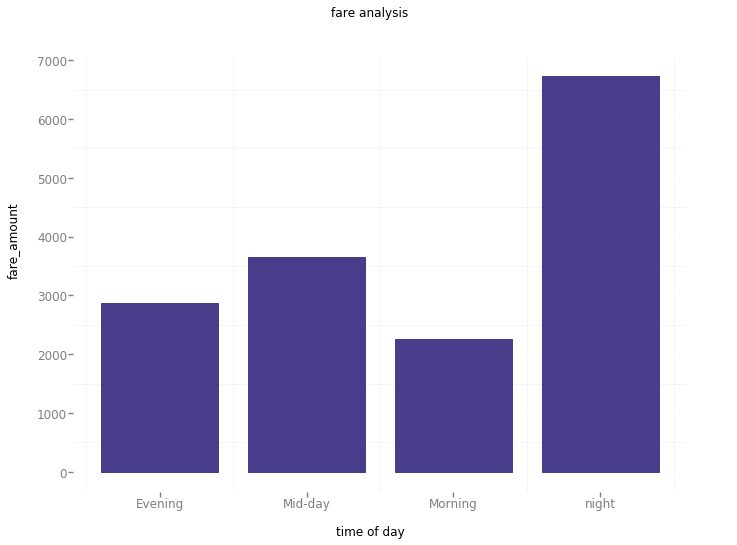

<ggplot: (121265348367)>

In [442]:
ggplot(cab_train,aes(x="time_of_day",y="fare_amount"))+\
geom_bar(fill="darkslateblue")+\
scale_color_brewer(type="diverging",palette=4)+\
xlab("time of day")+ylab("fare_amount")+ggtitle("fare analysis")+theme_bw()

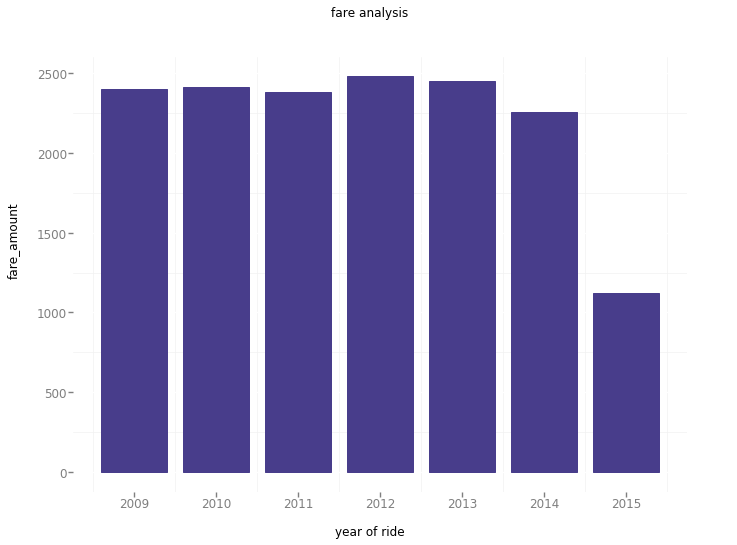

<ggplot: (-9223371915589427361)>

In [443]:
ggplot(cab_train,aes(x="pickup_year",y="fare_amount"))+\
geom_bar(fill="darkslateblue")+\
scale_color_brewer(type="diverging",palette=4)+\
xlab("year of ride")+ylab("fare_amount")+ggtitle("fare analysis")+theme_bw()

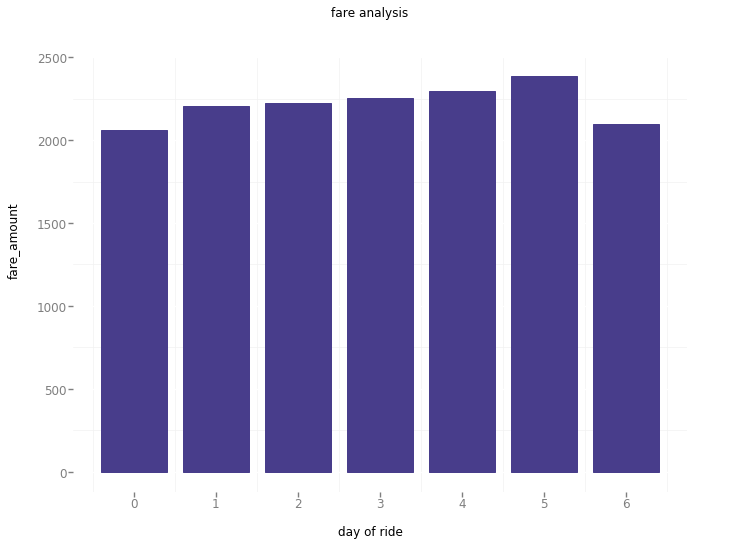

<ggplot: (-9223371915624116171)>

In [444]:
ggplot(cab_train,aes(x="pickup_day",y="fare_amount"))+\
geom_bar(fill="darkslateblue")+\
scale_color_brewer(type="diverging",palette=4)+\
xlab("day of ride")+ylab("fare_amount")+ggtitle("fare analysis")+theme_bw()

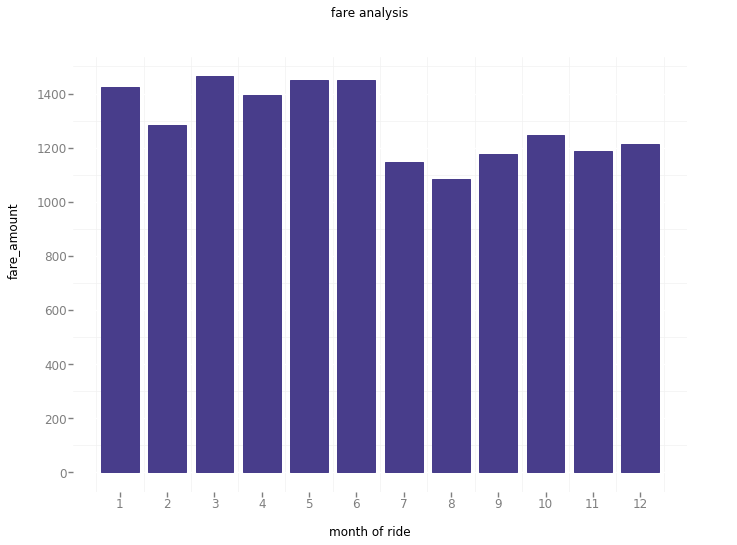

<ggplot: (121230699447)>

In [445]:
ggplot(cab_train,aes(x="pickup_month",y="fare_amount"))+\
geom_bar(fill="darkslateblue")+\
scale_color_brewer(type="diverging",palette=4)+\
xlab("month of ride")+ylab("fare_amount")+ggtitle("fare analysis")+theme_bw()

[Text(0, 0.5, 'fare of ride'),
 Text(0.5, 0, 'distance covered'),
 Text(0.5, 1.0, 'dist covered vs fare amount')]

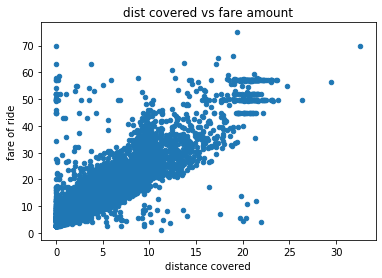

In [446]:
(cab_train.plot.scatter(x='dist_covered',y='fare_amount')
.set(title='dist covered vs fare amount',
      xlabel='distance covered',
      ylabel='fare of ride'))

[Text(0, 0.5, 'fare of ride'),
 Text(0.5, 0, 'distance covered'),
 Text(0.5, 1.0, 'dist covered vs fare amount')]

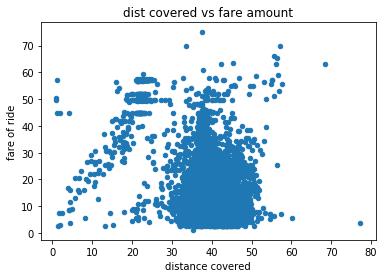

In [447]:
(cab_train.plot.scatter(x='jfk_dist',y='fare_amount')
.set(title='dist covered vs fare amount',
      xlabel='distance covered',
      ylabel='fare of ride'))

[Text(0, 0.5, 'fare of ride'),
 Text(0.5, 0, 'distance covered'),
 Text(0.5, 1.0, 'dist covered vs fare amount')]

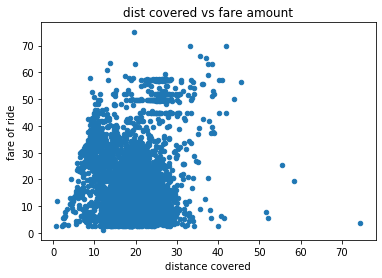

In [448]:
(cab_train.plot.scatter(x='lag_dist',y='fare_amount')
.set(title='dist covered vs fare amount',
      xlabel='distance covered',
      ylabel='fare of ride'))

[Text(0, 0.5, 'fare of ride'),
 Text(0.5, 0, 'distance covered'),
 Text(0.5, 1.0, 'dist covered vs fare amount')]

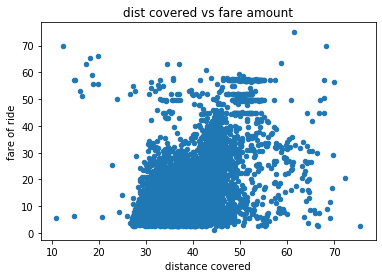

In [449]:
(cab_train.plot.scatter(x='newark_dist',y='fare_amount')
.set(title='dist covered vs fare amount',
      xlabel='distance covered',
      ylabel='fare of ride'))

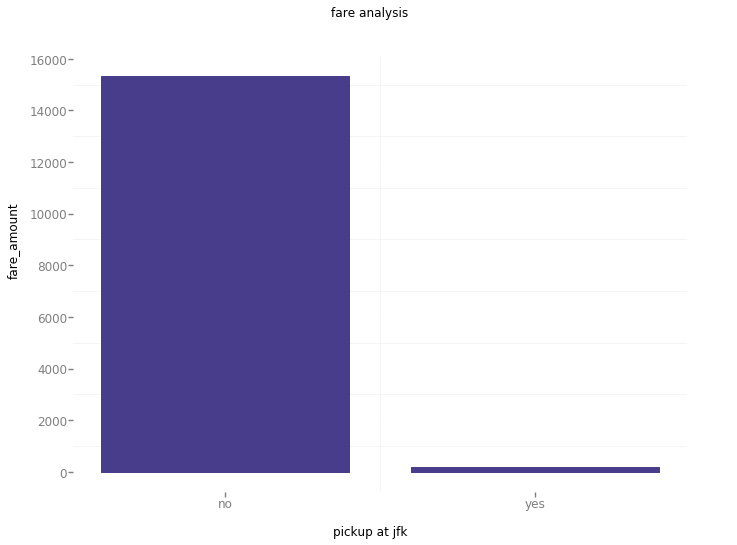

<ggplot: (-9223371915623027140)>

In [450]:
ggplot(cab_train,aes(x="pickup_jfk",y="fare_amount"))+\
geom_bar(fill="darkslateblue")+\
scale_color_brewer(type="diverging",palette=4)+\
xlab("pickup at jfk")+ylab("fare_amount")+ggtitle("fare analysis")+theme_bw()

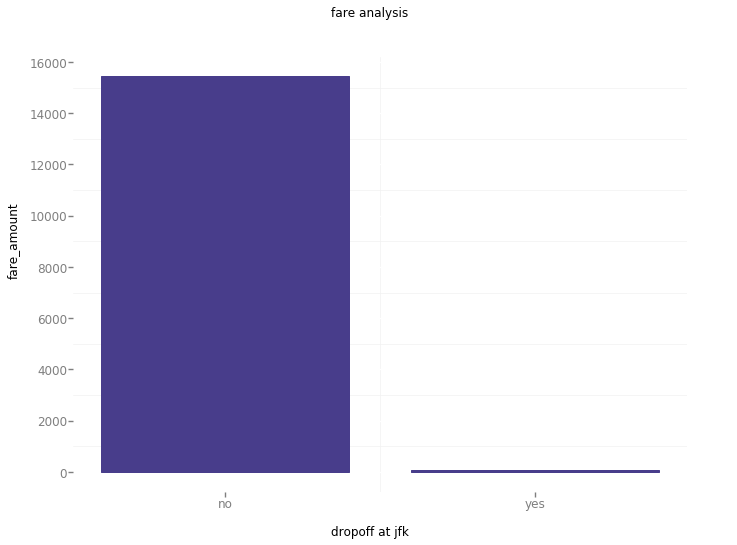

<ggplot: (121231767588)>

In [451]:
ggplot(cab_train,aes(x="dropoff_jfk",y="fare_amount"))+\
geom_bar(fill="darkslateblue")+\
scale_color_brewer(type="diverging",palette=4)+\
xlab("dropoff at jfk")+ylab("fare_amount")+ggtitle("fare analysis")+theme_bw()

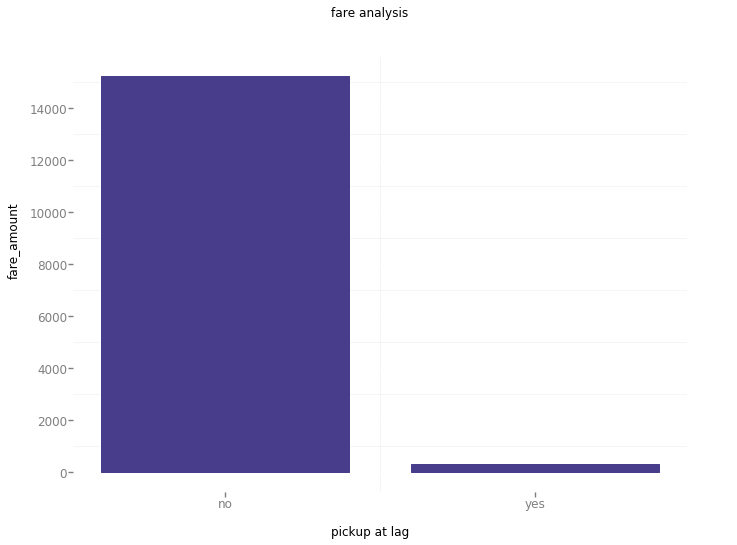

<ggplot: (-9223371915622963091)>

In [452]:
ggplot(cab_train,aes(x="pickup_lag",y="fare_amount"))+\
geom_bar(fill="darkslateblue")+\
scale_color_brewer(type="diverging",palette=4)+\
xlab("pickup at lag")+ylab("fare_amount")+ggtitle("fare analysis")+theme_bw()

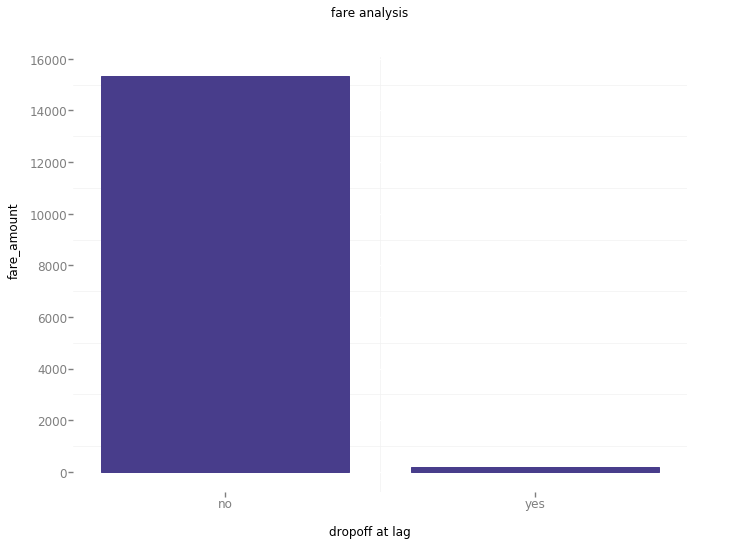

<ggplot: (121231815260)>

In [453]:
ggplot(cab_train,aes(x="dropoff_lag",y="fare_amount"))+\
geom_bar(fill="darkslateblue")+\
scale_color_brewer(type="diverging",palette=4)+\
xlab("dropoff at lag")+ylab("fare_amount")+ggtitle("fare analysis")+theme_bw()

# Correlation analysis

In [454]:
cab_train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
pickup_year                   int64
pickup_month                  int64
pickup_date                   int64
pickup_day                    int64
pickup_hour                   int64
dist_covered                float64
jfk_dist                    float64
lag_dist                    float64
newark_dist                 float64
pickup_jfk                   object
dropoff_jfk                  object
pickup_lag                   object
dropoff_lag                  object
time_of_day                  object
dtype: object

In [455]:
# dropping pickup_datetime from both data set as we have extracted relevant info from it
cab_train=cab_train.drop(['pickup_datetime'],axis=1)
cab_test=cab_test.drop(['pickup_datetime'],axis=1)

In [456]:
cab_train.shape , cab_test.shape

((15519, 20), (9914, 19))

In [457]:
cnames=cab_train._get_numeric_data().columns
cnames

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_year', 'pickup_month', 'pickup_date', 'pickup_day',
       'pickup_hour', 'dist_covered', 'jfk_dist', 'lag_dist', 'newark_dist'],
      dtype='object')

In [458]:
catnames=('pickup_jfk','dropoff_jfk','pickup_lag','dropoff_lag','time_of_day','fare_amount')

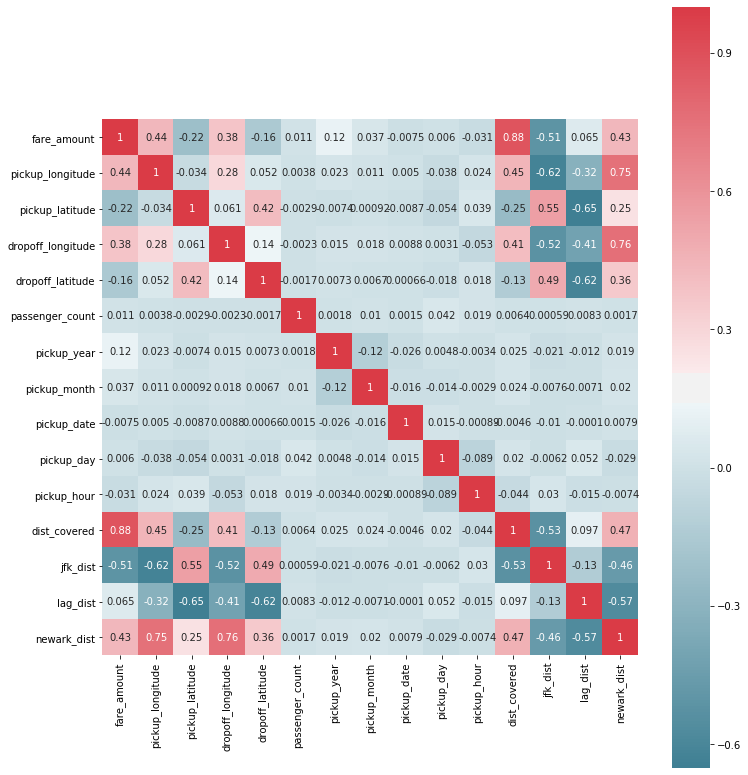

In [459]:
corr_data=cab_train.loc[:,cnames]
f, ax = plt.subplots(figsize=(12, 14))

corr = corr_data.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

1. jfk diist is positively correlated with latitudes and negetively with longitudes
2. lag_dist is negatively correlated with latitudes and longitudes
3. newark dist is positively correlated with latitudes and longitudes
4. all three airport distances are correlated with dist covered
5. Distances to airports are correlated with the fare amount

In [460]:
# dropping the airport distances and replotting correlation
cnames=('fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_year', 'pickup_month', 'pickup_date', 'pickup_day',
       'pickup_hour', 'dist_covered')

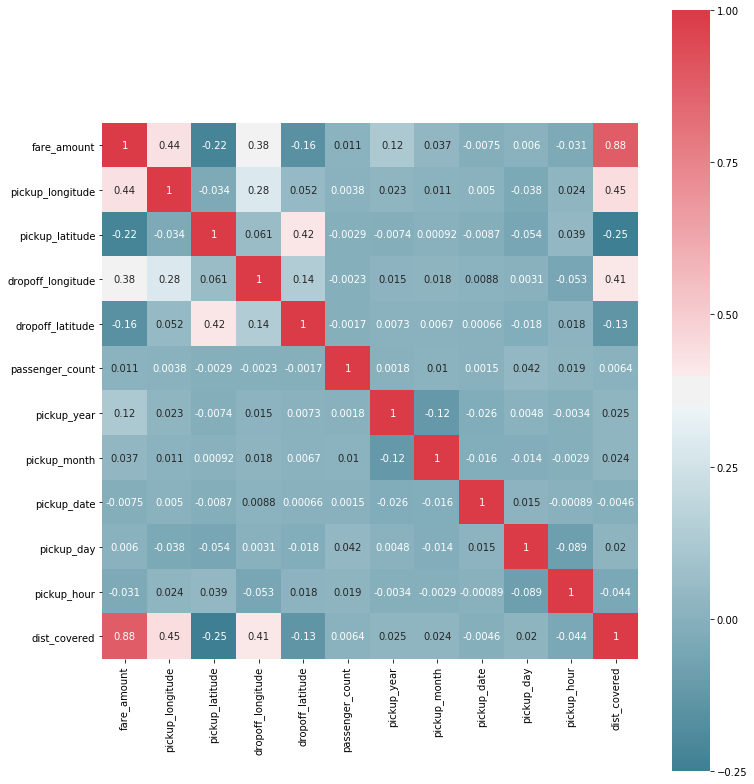

In [461]:
corr_data=cab_train.loc[:,cnames]
f, ax = plt.subplots(figsize=(12, 14))

corr = corr_data.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

1. pickup_day , pickup_date,pickup_month,pickup_hour are not correlated with fare amount

In [462]:
cnames=('fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_year', 'dist_covered')

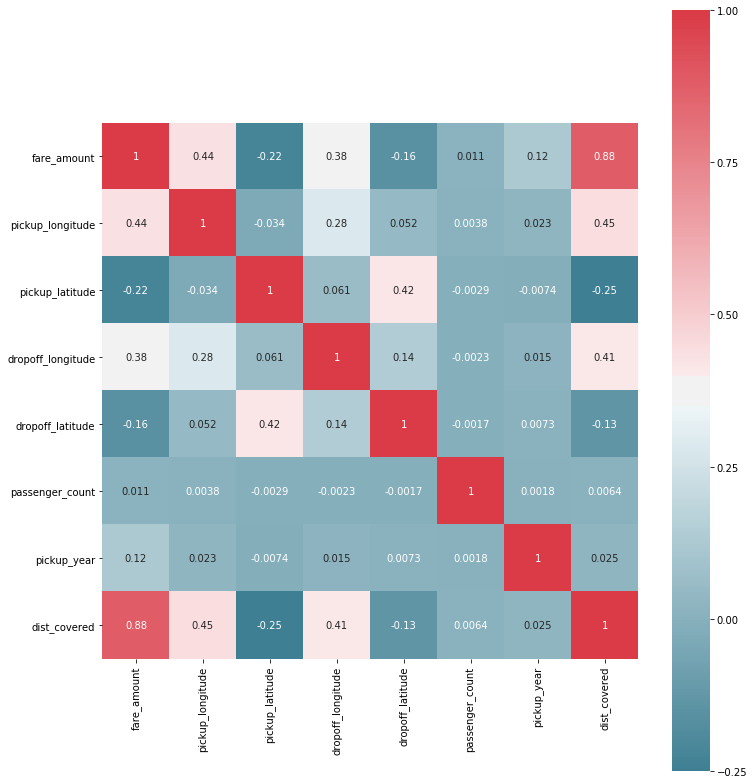

In [463]:
corr_data=cab_train.loc[:,cnames]
f, ax = plt.subplots(figsize=(12, 14))

corr = corr_data.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

In [464]:
cab_train['pickup_jfk']=cab_train['pickup_jfk'].replace('no',0)
cab_train['pickup_jfk']=cab_train['pickup_jfk'].replace('yes',1)

cab_train['dropoff_jfk']=cab_train['dropoff_jfk'].replace('no',0)
cab_train['dropoff_jfk']=cab_train['dropoff_jfk'].replace('yes',1)

cab_train['pickup_lag']=cab_train['pickup_lag'].replace('no',0)
cab_train['pickup_lag']=cab_train['pickup_lag'].replace('yes',1)

cab_train['dropoff_lag']=cab_train['dropoff_lag'].replace('no',0)
cab_train['dropoff_lag']=cab_train['dropoff_lag'].replace('yes',1)

In [465]:
cab_train['time_of_day']=cab_train['time_of_day'].replace('Morning',0)
cab_train['time_of_day']=cab_train['time_of_day'].replace('Mid-day',1)
cab_train['time_of_day']=cab_train['time_of_day'].replace('Evening',2)
cab_train['time_of_day']=cab_train['time_of_day'].replace('night',3)


In [466]:
## Converting in test data set
cab_test['pickup_jfk']=cab_test['pickup_jfk'].replace('no',0)
cab_test['pickup_jfk']=cab_test['pickup_jfk'].replace('yes',1)

cab_test['dropoff_jfk']=cab_test['dropoff_jfk'].replace('no',0)
cab_test['dropoff_jfk']=cab_test['dropoff_jfk'].replace('yes',1)

cab_test['pickup_lag']=cab_test['pickup_lag'].replace('no',0)
cab_test['pickup_lag']=cab_test['pickup_lag'].replace('yes',1)

cab_test['dropoff_lag']=cab_test['dropoff_lag'].replace('no',0)
cab_test['dropoff_lag']=cab_test['dropoff_lag'].replace('yes',1)

In [467]:
cab_test['time_of_day']=cab_test['time_of_day'].replace('Morning',0)
cab_test['time_of_day']=cab_test['time_of_day'].replace('Mid-day',1)
cab_test['time_of_day']=cab_test['time_of_day'].replace('Evening',2)
cab_test['time_of_day']=cab_test['time_of_day'].replace('night',3)

In [468]:
cab_train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,pickup_day,pickup_hour,dist_covered,jfk_dist,lag_dist,newark_dist,pickup_jfk,dropoff_jfk,pickup_lag,dropoff_lag,time_of_day
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,1.030764,20.042400,14.353463,56.233397,0,0,0,0,2
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,8.450134,44.594298,22.896278,32.976335,0,0,0,0,2
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,1.389525,43.497948,19.619927,34.893434,0,0,0,0,3
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,2.799270,42.561882,20.818765,33.720979,0,0,0,0,0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,1.999157,43.180949,14.986257,40.596756,0,0,0,0,0


In [469]:
## ANOVA test

f1,p1=stats.f_oneway(cab_train['pickup_jfk'],cab_train['fare_amount'])
f2,p2=stats.f_oneway(cab_train['dropoff_jfk'],cab_train['fare_amount'])
f3,p3=stats.f_oneway(cab_train['pickup_lag'],cab_train['fare_amount'])
f4,p4=stats.f_oneway(cab_train['dropoff_lag'],cab_train['fare_amount'])
f5,p5=stats.f_oneway(cab_train['time_of_day'],cab_train['fare_amount'])

In [470]:
anova_results=pd.DataFrame({'feature':['pickup_jfk','dropoff_jfk','pickup_lag','dropoff_lag','time_of_day'],'F_value':[f1,f2,f3,f4,f5],
                           'P_value':[p1,p2,p3,p4,p5]})

In [471]:
anova_results

,feature,F_value,P_value
0,pickup_jfk,23592.072279,0.0
1,dropoff_jfk,23627.166389,0.0
2,pickup_lag,23561.960086,0.0
3,dropoff_lag,23592.651825,0.0
4,time_of_day,16044.214771,0.0


1. As seen in the ANOVA results F values are very high indicating that the features are very important in explaining target
2. P value less than 0.05 which also shows that features are correlated to the target variable.

In [472]:
# After Trial and run of models with different set of features related to airports,the factor features containing pickup and,
# dropoff at airport gave higher RMSE when compared with features with airport distances.
# Since only around 200 rides have pickup and dropoff at airports, these features are not explaining much of variance in fareamount.
# Hence  the final features would contain the airport distances instead of pickup and dropoffs at airports.
# airport distances are also correlated with the fare amount.

In [473]:
#

In [474]:
## dropping variables
cab_train=cab_train.drop(['pickup_jfk','dropoff_jfk','pickup_lag','dropoff_lag','pickup_date','pickup_day'],axis=1)
cab_test=cab_test.drop(['pickup_jfk','dropoff_jfk','pickup_lag','dropoff_lag','pickup_date','pickup_day'],axis=1)

In [475]:
cab_train.shape , cab_test.shape

((15519, 14), (9914, 13))

In [476]:
cab_train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_hour,dist_covered,jfk_dist,lag_dist,newark_dist,time_of_day
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,17,1.030764,20.042400,14.353463,56.233397,2
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,16,8.450134,44.594298,22.896278,32.976335,2
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,0,1.389525,43.497948,19.619927,34.893434,3
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,4,2.799270,42.561882,20.818765,33.720979,0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,7,1.999157,43.180949,14.986257,40.596756,0


In [477]:
cab_train.iloc[:,1:14].head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_hour,dist_covered,jfk_dist,lag_dist,newark_dist,time_of_day
0,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,17,1.030764,20.042400,14.353463,56.233397,2
1,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,16,8.450134,44.594298,22.896278,32.976335,2
2,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,0,1.389525,43.497948,19.619927,34.893434,3
3,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,4,2.799270,42.561882,20.818765,33.720979,0
4,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,7,1.999157,43.180949,14.986257,40.596756,0


In [478]:
# To get the varible importance in predicting fare_amount
linear_model=sm.OLS(cab_train.iloc[:,0],cab_train.iloc[:,1:17]).fit()

In [479]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            fare_amount   R-squared (uncentered):                   0.918
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                          1.341e+04
Date:                Wed, 11 Dec 2019   Prob (F-statistic):                        0.00
Time:                        16:01:28   Log-Likelihood:                         -43989.
No. Observations:               15519   AIC:                                  8.800e+04
Df Residuals:                   15506   BIC:                                  8.810e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
pickup_longitude     -3.1366      2.068     -1.517      0.129      -7.190       0.917
pickup_latitude     -17.9579      3.817     -4.705      0.000     -25.439     -10.477
dropoff_longitude   -11.0166      2.054     -5.364      0.000     -15.042      -6.991
dropoff_latitude    -32.5308      3.382     -9.620      0.000     -39.159     -25.902
passenger_count       0.0404      0.026      1.545      0.122      -0.011       0.092
pickup_year           0.5022      0.018     28.171      0.000       0.467       0.537
pickup_month          0.0751      0.010      7.776      0.000       0.056       0.094
pickup_hour           0.0328      0.006      5.359      0.000       0.021       0.045
dist_covered          2.1805      0.012    175.609      0.000       2.156       2.205
jfk_dist              0.0470      0.024      1.962      0.050    5.17e-05       0.094
lag_dist             -0.1922      0.020     -9.619      0.000      -0.231      -0.153
newark_dist           0.1470      0.034      4.290      0.000       0.080       0.214
time_of_day          -0.2371      0.036     -6.643      0.000      -0.307      -0.167
==============================================================================
Omnibus:                    14930.032   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2215111.653
Skew:                           4.261   Prob(JB):                         0.00
Kurtosis:                      60.905   Cond. No.                     3.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [480]:
cab_train.iloc[:,1:14].head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_hour,dist_covered,jfk_dist,lag_dist,newark_dist,time_of_day
0,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,17,1.030764,20.042400,14.353463,56.233397,2
1,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,16,8.450134,44.594298,22.896278,32.976335,2
2,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,0,1.389525,43.497948,19.619927,34.893434,3
3,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,4,2.799270,42.561882,20.818765,33.720979,0
4,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,7,1.999157,43.180949,14.986257,40.596756,0


In [481]:
linear_model=sm.OLS(cab_train.iloc[:,0],cab_train.iloc[:,1:14]).fit()

In [482]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            fare_amount   R-squared (uncentered):                   0.918
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                          1.341e+04
Date:                Wed, 11 Dec 2019   Prob (F-statistic):                        0.00
Time:                        16:01:28   Log-Likelihood:                         -43989.
No. Observations:               15519   AIC:                                  8.800e+04
Df Residuals:                   15506   BIC:                                  8.810e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
pickup_longitude     -3.1366      2.068     -1.517      0.129      -7.190       0.917
pickup_latitude     -17.9579      3.817     -4.705      0.000     -25.439     -10.477
dropoff_longitude   -11.0166      2.054     -5.364      0.000     -15.042      -6.991
dropoff_latitude    -32.5308      3.382     -9.620      0.000     -39.159     -25.902
passenger_count       0.0404      0.026      1.545      0.122      -0.011       0.092
pickup_year           0.5022      0.018     28.171      0.000       0.467       0.537
pickup_month          0.0751      0.010      7.776      0.000       0.056       0.094
pickup_hour           0.0328      0.006      5.359      0.000       0.021       0.045
dist_covered          2.1805      0.012    175.609      0.000       2.156       2.205
jfk_dist              0.0470      0.024      1.962      0.050    5.17e-05       0.094
lag_dist             -0.1922      0.020     -9.619      0.000      -0.231      -0.153
newark_dist           0.1470      0.034      4.290      0.000       0.080       0.214
time_of_day          -0.2371      0.036     -6.643      0.000      -0.307      -0.167
==============================================================================
Omnibus:                    14930.032   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2215111.653
Skew:                           4.261   Prob(JB):                         0.00
Kurtosis:                      60.905   Cond. No.                     3.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [483]:
cab_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_hour,dist_covered,jfk_dist,lag_dist,newark_dist,time_of_day
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,13,2.323259,41.950983,18.256350,36.216410,1
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,13,2.425353,41.193221,22.781761,31.961468,1
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,11,0.618628,41.737895,19.107417,35.163477,1
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,21,1.961033,43.858134,19.281926,35.452695,3
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,21,5.387301,44.006856,18.183540,37.621502,3


In [484]:
cab_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_hour,dist_covered,jfk_dist,lag_dist,newark_dist,time_of_day
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,13,2.323259,41.950983,18.256350,36.216410,1
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,13,2.425353,41.193221,22.781761,31.961468,1
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,11,0.618628,41.737895,19.107417,35.163477,1
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,21,1.961033,43.858134,19.281926,35.452695,3
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,21,5.387301,44.006856,18.183540,37.621502,3


In [485]:
#cab_train.to_csv('train_model.csv',index=False)
#cab_test.to_csv('test_model.csv',index=False)

In [486]:
#cab_train=pd.read_csv('train_model.csv')
#cab_test=pd.read_csv('test_model.csv')

In [487]:
cab_train.shape

(15519, 14)

# MODEL DEVELOPMENT

In [488]:
# dividing the train data set
x_train, x_test, y_train, y_test = train_test_split( cab_train.iloc[:, cab_train.columns != 'fare_amount'], 
                         cab_train.iloc[:, 0], test_size = 0.20, random_state = 1)

In [489]:
y_train.shape,x_train.shape, y_test.shape, x_test.shape

((12415,), (12415, 13), (3104,), (3104, 13))

# Linear regression

In [490]:
from sklearn.linear_model import LinearRegression
lr_model= LinearRegression().fit(x_train , y_train)

In [491]:
lr_predictions=lr_model.predict(x_test)

In [492]:
lr_RMSE = np.sqrt(mean_squared_error(y_test,lr_predictions))
lr_RMSE

4.628026568319559

In [493]:
np.sqrt(((lr_predictions - y_test) ** 2).mean()) # RMSE

4.6280265683195605

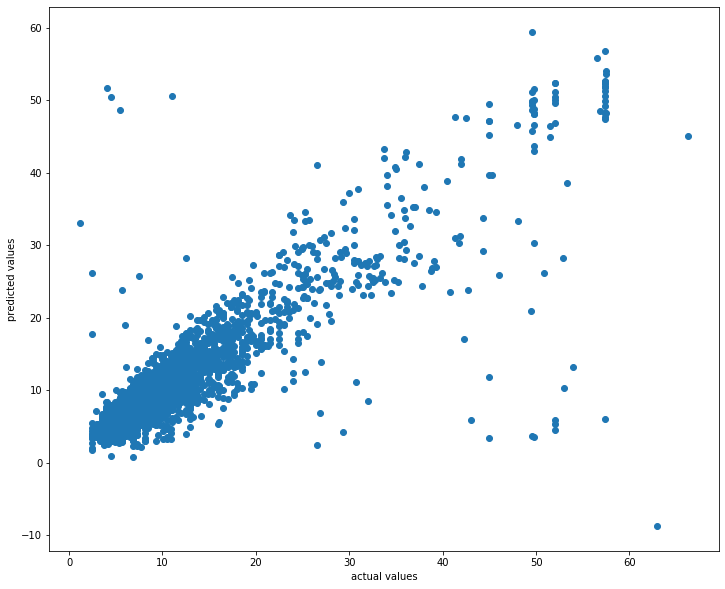

In [494]:
fig,ax=plt.subplots(figsize=(12,10))
ax.scatter(y_test,lr_predictions)
ax.set_xlabel('actual values')
ax.set_ylabel('predicted values')
plt.show()

# Decission tree

In [495]:
from sklearn.tree import DecisionTreeRegressor


In [496]:
dt_model=DecisionTreeRegressor(max_depth = 5).fit(x_train,y_train)

In [497]:
dt_predictions = dt_model.predict(x_test)

In [498]:
np.sqrt(((dt_predictions - y_test) ** 2).mean()) # RMSE


4.380356037503222

In [499]:
np.mean(np.abs((y_test - dt_predictions) / y_test)) * 100 # MAPE

23.70930115474462

In [500]:
## Tuning the parameters
max_leaf_node= range(10,30)
test_RMSE = []
for depth,max_leaf_node in zip(range(1,21),max_leaf_node):
    dt_model=DecisionTreeRegressor(max_depth=depth,max_leaf_nodes=max_leaf_node).fit(x_train,y_train)
    dt_predictions=dt_model.predict(x_test)
    test_RMSE.append(np.sqrt(((dt_predictions - y_test) ** 2).mean()))

In [501]:
dt_frame=pd.DataFrame({'max_depth':range(1,21),'max_leaf_node':range(10,30),'test_RMSE':test_RMSE})
dt_frame

,max_depth,max_leaf_node,test_RMSE
0,1,10,6.289572
1,2,11,5.040057
2,3,12,4.771390
3,4,13,4.627872
4,5,14,4.466081
5,6,15,4.500503
6,7,16,4.462193
7,8,17,4.438390
8,9,18,4.425846
9,10,19,4.423400


In [502]:
best_param=dt_frame.loc[dt_frame['test_RMSE']==min(dt_frame['test_RMSE'])].index
best_depth=int(dt_frame.iloc[best_param,0])
best_leaf=int(dt_frame.iloc[best_param,1])

In [503]:
best_depth,best_leaf

(15, 24)

In [504]:
# at max_depth of 15 and max_leaf_nodes 0f 24 model is performing better

In [505]:
dt_model=DecisionTreeRegressor(max_depth = best_depth,max_leaf_nodes=best_leaf).fit(x_train,y_train)

In [506]:
dt_predictions = dt_model.predict(x_test)

In [507]:
np.sqrt(((dt_predictions - y_test) ** 2).mean()) # RMSE

4.368866630887571

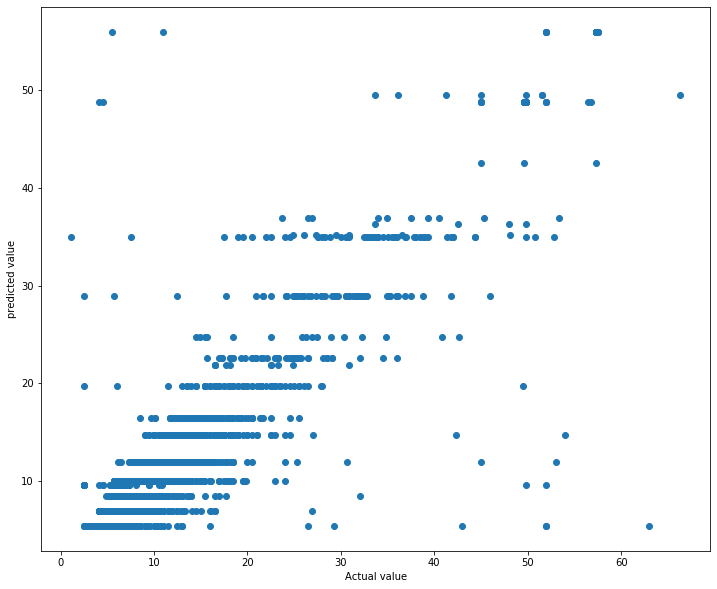

In [508]:
fig,ax=plt.subplots(figsize=(12,10))
ax.scatter(y_test,dt_predictions)
ax.set_xlabel('Actual value')
ax.set_ylabel('predicted value')
plt.show()

# Random Forest

In [509]:
from sklearn.ensemble import RandomForestRegressor

In [510]:
rf_model = RandomForestRegressor(n_estimators = 250).fit(x_train,y_train)

In [511]:
rf_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [512]:
rf_predictions = rf_model.predict(x_test)

In [513]:
np.sqrt(((rf_predictions - y_test) ** 2).mean()) # RMSE

3.9805957757710226

In [514]:
np.mean(np.abs((y_test - rf_predictions) / y_test)) * 100 # MAPE

21.776468114047805

In [515]:

from sklearn.model_selection import RandomizedSearchCV

In [516]:
RF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,500,2))
depth = list(range(1,50,2))

In [517]:
# Creating the random grid to tune the parameters
grid = {'n_estimators': n_estimator,
               'max_depth': depth}

In [518]:
randomcv_rf = RandomizedSearchCV(RF, param_distributions = grid, n_iter = 5, cv = 5, random_state=0)


In [519]:
randomcv_rf_model = randomcv_rf.fit(x_train,y_train)
rf_predictions = randomcv_rf_model.predict(x_test)

In [520]:
best_params_RF = randomcv_rf_model.best_params_
best_params_RF

{'n_estimators': 215, 'max_depth': 21}

In [521]:
np.sqrt(((rf_predictions - y_test) ** 2).mean()) # RMSE

4.002904891605375

In [522]:
best_model = randomcv_rf_model.best_estimator_

best_rf_pred= best_model.predict(x_test)

In [523]:
np.sqrt(((best_rf_pred - y_test) ** 2).mean()) # RMSE

4.002904891605375

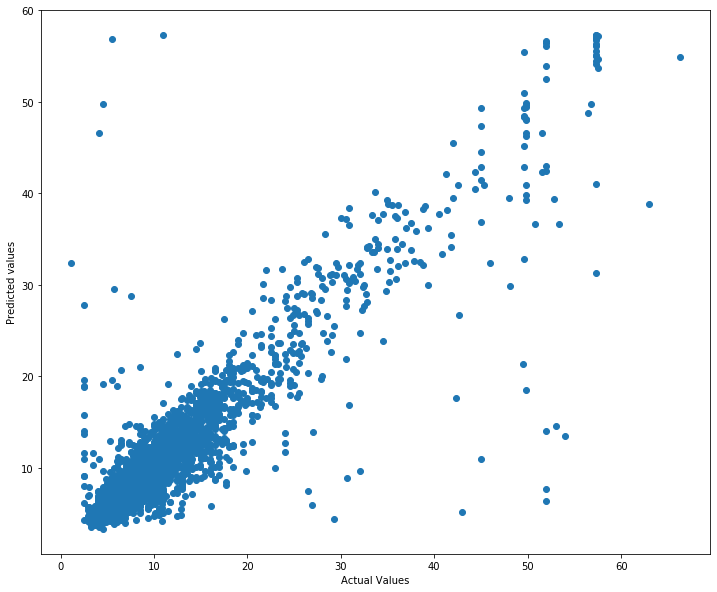

In [524]:
fig,ax=plt.subplots(figsize=(12,10))
ax.scatter(y_test,rf_predictions)
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted values')
plt.show()

# LightBoost Model

In [525]:
params={'boosting_type':'gbdt','objective':'regression','num_iterations':1000,'eta':0.3,'early_stopping_rounds':100,
       'metric': 'rmse'}

In [526]:
lgb_train = lgbm.Dataset(x_train, y_train, free_raw_data=False)

In [527]:
lgb_valid=lgbm.Dataset(x_test,y_test)

In [528]:
model = lgbm.train(params, train_set = lgb_train,valid_sets=lgb_valid)

C:\Users\rakshith\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\rakshith\Anaconda3\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's rmse: 6.96695
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 5.69112
[3]	valid_0's rmse: 4.96044
[4]	valid_0's rmse: 4.56908
[5]	valid_0's rmse: 4.37195
[6]	valid_0's rmse: 4.27579
[7]	valid_0's rmse: 4.20595
[8]	valid_0's rmse: 4.16409
[9]	valid_0's rmse: 4.14672
[10]	valid_0's rmse: 4.12818
[11]	valid_0's rmse: 4.12883
[12]	valid_0's rmse: 4.13227
[13]	valid_0's rmse: 4.11348
[14]	valid_0's rmse: 4.11955
[15]	valid_0's rmse: 4.10812
[16]	valid_0's rmse: 4.10704
[17]	valid_0's rmse: 4.09499
[18]	valid_0's rmse: 4.08952
[19]	valid_0's rmse: 4.08647
[20]	valid_0's rmse: 4.08321
[21]	valid_0's rmse: 4.07662
[22]	valid_0's rmse: 4.08826
[23]	valid_0's rmse: 4.08294
[24]	valid_0's rmse: 4.07337
[25]	valid_0's rmse: 4.07226
[26]	valid_0's rmse: 4.07556
[27]	valid_0's rmse: 4.07852
[28]	valid_0's rmse: 4.0866
[29]	valid_0's rmse: 4.09293
[30]	valid_0's rmse: 4.0839
[31]	valid_0's rmse: 4.0825
[32]	valid_0's rmse: 4.08591
[33]	valid_0's rmse: 4

In [529]:
lgb_pred = model.predict(x_test, num_iteration = model.best_iteration) 


In [530]:
np.sqrt(((lgb_pred - y_test) ** 2).mean()) # RMSE  3.97591

4.072261939728557

In [531]:
np.mean(np.abs((y_test - lgb_pred) / y_test)) * 100 # MAPE 21.52538392076428                rmse: 3.97591

20.825847279583527

In [532]:
lgb_pred

array([ 4.67070006,  5.80003262,  5.74409789, ..., 11.01833649,
        9.15487173,  7.21893108])

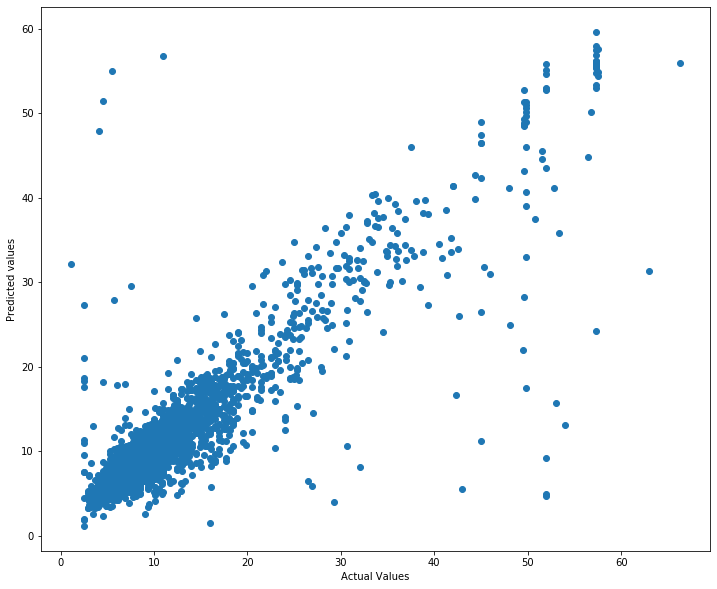

In [533]:
fig,ax=plt.subplots(figsize=(12,10))
ax.scatter(y_test,lgb_pred)
ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted values")
plt.show()

# XGBOOST MODEL

In [534]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test)

C:\Users\rakshith\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [535]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, eta = 0.3,
                max_depth = 4, n_estimators = 100)

In [536]:
xg_reg.fit(x_train,y_train)

[16:21:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [537]:
preds = xg_reg.predict(x_test)

In [538]:
np.sqrt(((preds - y_test) ** 2).mean()) # RMSE

3.8884792209318095

In [539]:
## Using Cross Validation to find out the best result

In [540]:
param = {"objective":"reg:linear",'eta': 0.3,
                'max_depth': 4, 'alpha': 10}

In [541]:
cv_results = xgb.cv(dtrain=dtrain, params=param, nfold=5,
                    num_boost_round=500,early_stopping_rounds=100,metrics="rmse",  verbose_eval=1, seed=123)

[16:21:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:21:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:21:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:21:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:21:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:10.2395+0.0744201	test-rmse:10.2627+0.318815
[1]	train-rmse:7.69173+0.0531897	test-rmse:7.73932+0.243587
[2]	train-rmse:6.01777+0.0362518	test-rmse:6.08675+0.189184


In [542]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,10.239463,0.074420,10.262729,0.318815
1,7.691734,0.053190,7.739322,0.243587
2,6.017768,0.036252,6.086750,0.189184
3,4.957854,0.032123,5.069217,0.153458
4,4.303866,0.026132,4.472114,0.121859
5,3.923621,0.031195,4.143759,0.113592
6,3.696975,0.031276,3.956891,0.105055
7,3.553798,0.034623,3.852801,0.091737
8,3.461057,0.032165,3.781768,0.097261
9,3.387732,0.036973,3.737914,0.091541


In [543]:
print((cv_results["test-rmse-mean"]).tail(1))

45    3.616687
Name: test-rmse-mean, dtype: float64


In [544]:
best_boost_round=cv_results.loc[cv_results['test-rmse-mean']==min(cv_results['test-rmse-mean'])].index[0]
best_boost_round

45

In [545]:
xg_reg = xgb.train(params=param, dtrain=dtrain, num_boost_round=best_boost_round)

[16:21:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [546]:
xg_pred=xg_reg.predict(dtest)

In [547]:
np.sqrt(((xg_pred - y_test) ** 2).mean()) # RMSE

3.950464946254975

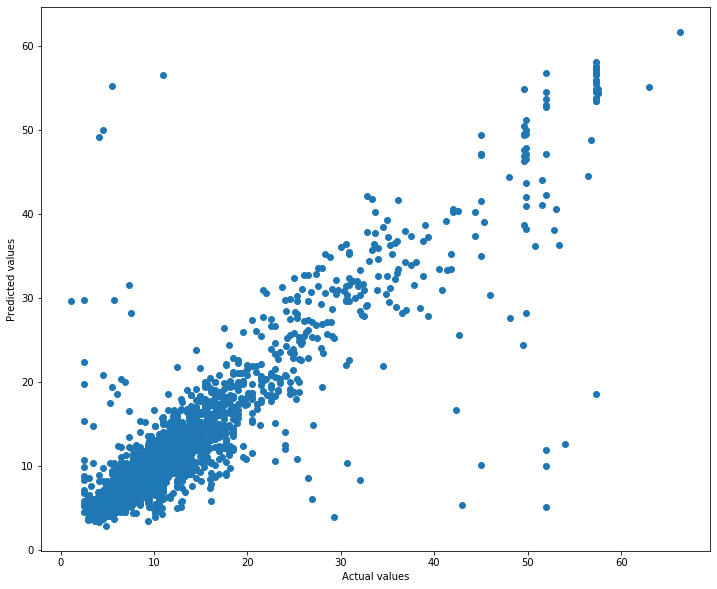

In [548]:
fig,ax=plt.subplots(figsize=(12,10))
ax.scatter(y_test,xg_pred)
ax.set_xlabel("Actual values")
ax.set_ylabel("Predicted values")
plt.show()

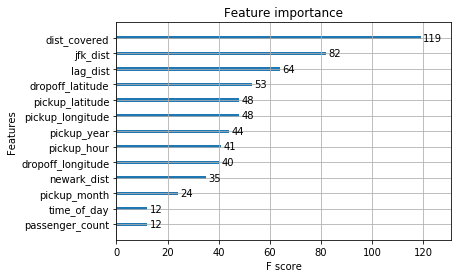

In [549]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

# Model Selection

1. Xgboost is giving the least of RMSE at 3.616687
2. lgboost is giving an RMSE of 3.97591
3. Random Forest Regressor is giving an RMSE of 3.961830
4. Decision Tree Regreesor is giving an RMSE of 4.144045764
5. Linear regressor model is generating an RMSE of 4.478633

6. Hence Xgboost Would be used to Train On the complete Train data set, and predict the cab fares in test data set

# XGBoost Model / Final Model

In [550]:
cab_train.shape , cab_test.shape

((15519, 14), (9914, 13))

In [551]:
train_comp=xgb.DMatrix(cab_train.iloc[:,1:14], label=cab_train.iloc[:,0])
test_comp=xgb.DMatrix(cab_test)

C:\Users\rakshith\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [552]:
parameters = {"objective":"reg:linear",'eta': 0.3,
                'max_depth': 4, 'alpha': 10}

In [553]:
cv = xgb.cv(dtrain=train_comp, params=parameters, nfold=5,
                    num_boost_round=500,early_stopping_rounds=100,metrics="rmse",  verbose_eval=1, seed=123)

[16:21:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:21:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:21:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:21:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:21:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:10.257+0.0343682	test-rmse:10.2919+0.146358
[1]	train-rmse:7.72531+0.0224758	test-rmse:7.78974+0.071405
[2]	train-rmse:6.06591+0.0255255	test-rmse:6.16185+0.0251847


In [554]:
print((cv["test-rmse-mean"]).tail(1))

75    3.701126
Name: test-rmse-mean, dtype: float64


In [555]:
best_iteration=cv.loc[cv['test-rmse-mean']==min(cv['test-rmse-mean'])].index[0]
best_iteration

75

In [556]:
xg_final=xgb.train(params=parameters, dtrain=train_comp, num_boost_round=best_iteration)

[16:22:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [557]:
final_predictions=xg_final.predict(test_comp)

In [558]:
final_predictions

array([ 9.7059   , 10.424477 ,  4.9387126, ..., 53.347187 , 21.873764 ,
        7.098587 ], dtype=float32)

In [563]:
# Reloading the test file
cab_test=pd.read_csv("test.csv")

In [564]:
cab_test['predicted_fare']=final_predictions

In [565]:
cab_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,predicted_fare
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,9.705900
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,10.424477
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,4.938713
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,8.548831
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,15.337590


In [562]:
#cab_test.to_csv("P_submission.csv",index=False)